In [1]:
#from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import OrderedDict, Counter
import os
import gelman_rubin

%matplotlib nbagg
%load_ext autoreload

plt.rcParams['nbagg.transparent'] = False
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
rt = '/home/michelle/BigData/BIRO_lensing/'

In [3]:
os.listdir(rt)

['testHMC-1000-RL.results', 'testHMC.chain', 'testHMC-1000-RL.chain']

In [104]:
chain = np.loadtxt(rt+'testHMC.chain')
#chain = np.loadtxt(rt+'testHMC-1000-RL.chain')

In [105]:
chain.shape

(12000, 3001)

### Here's one that's very, very unconverged

<IPython.core.display.Javascript object>


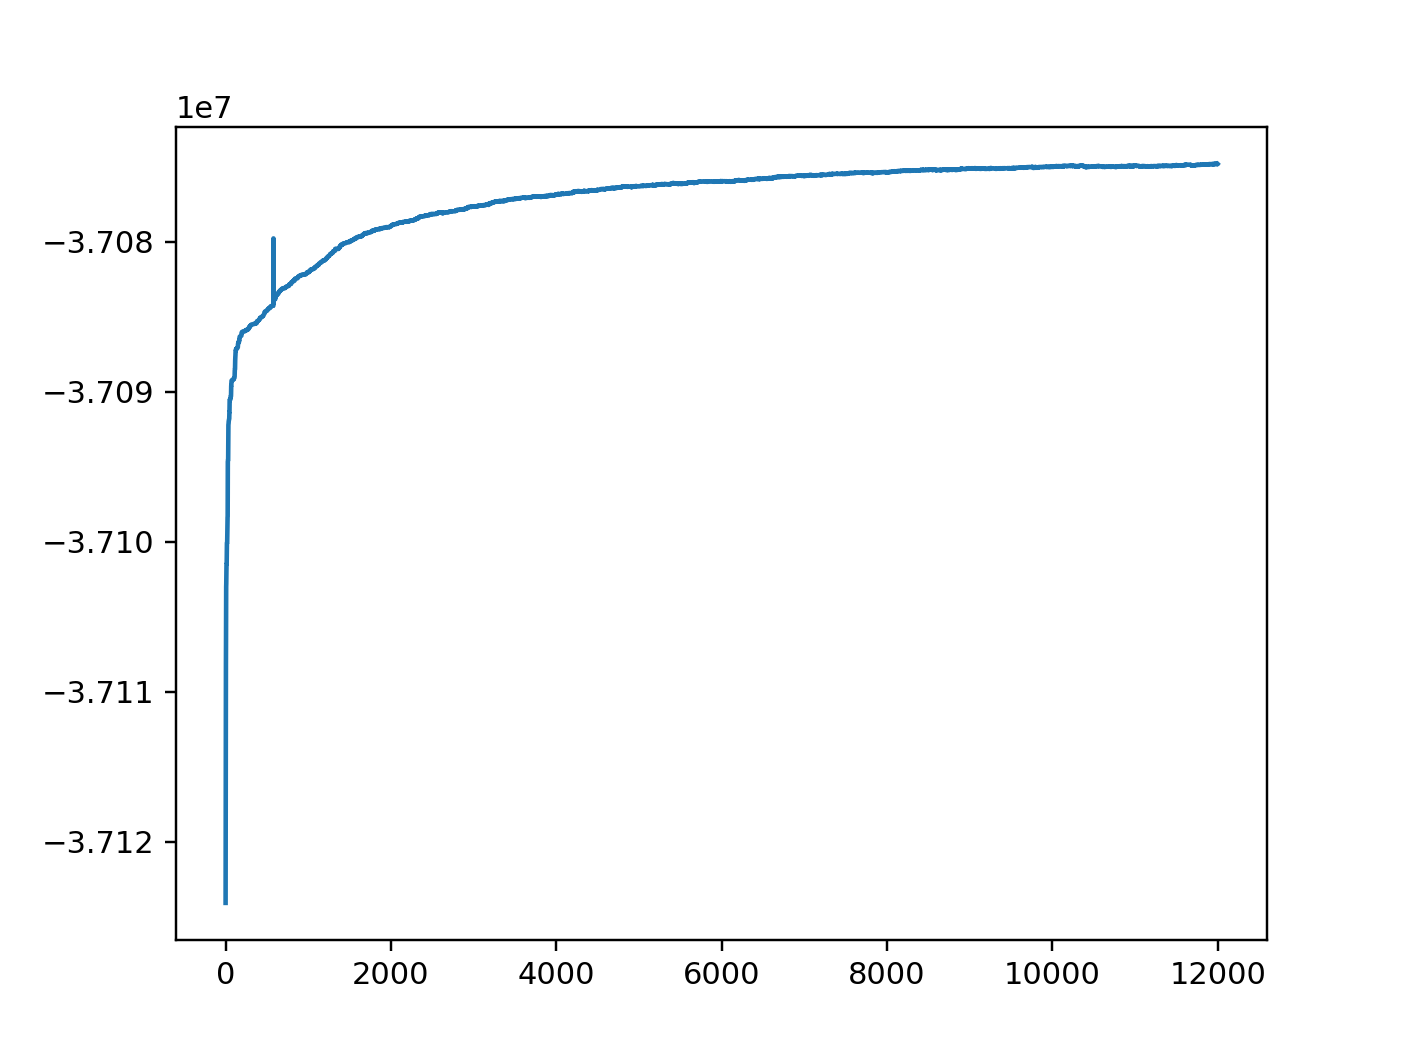

In [106]:
plt.figure()
plt.plot(chain[:,0]);

### This one looks nice and converged

<IPython.core.display.Javascript object>


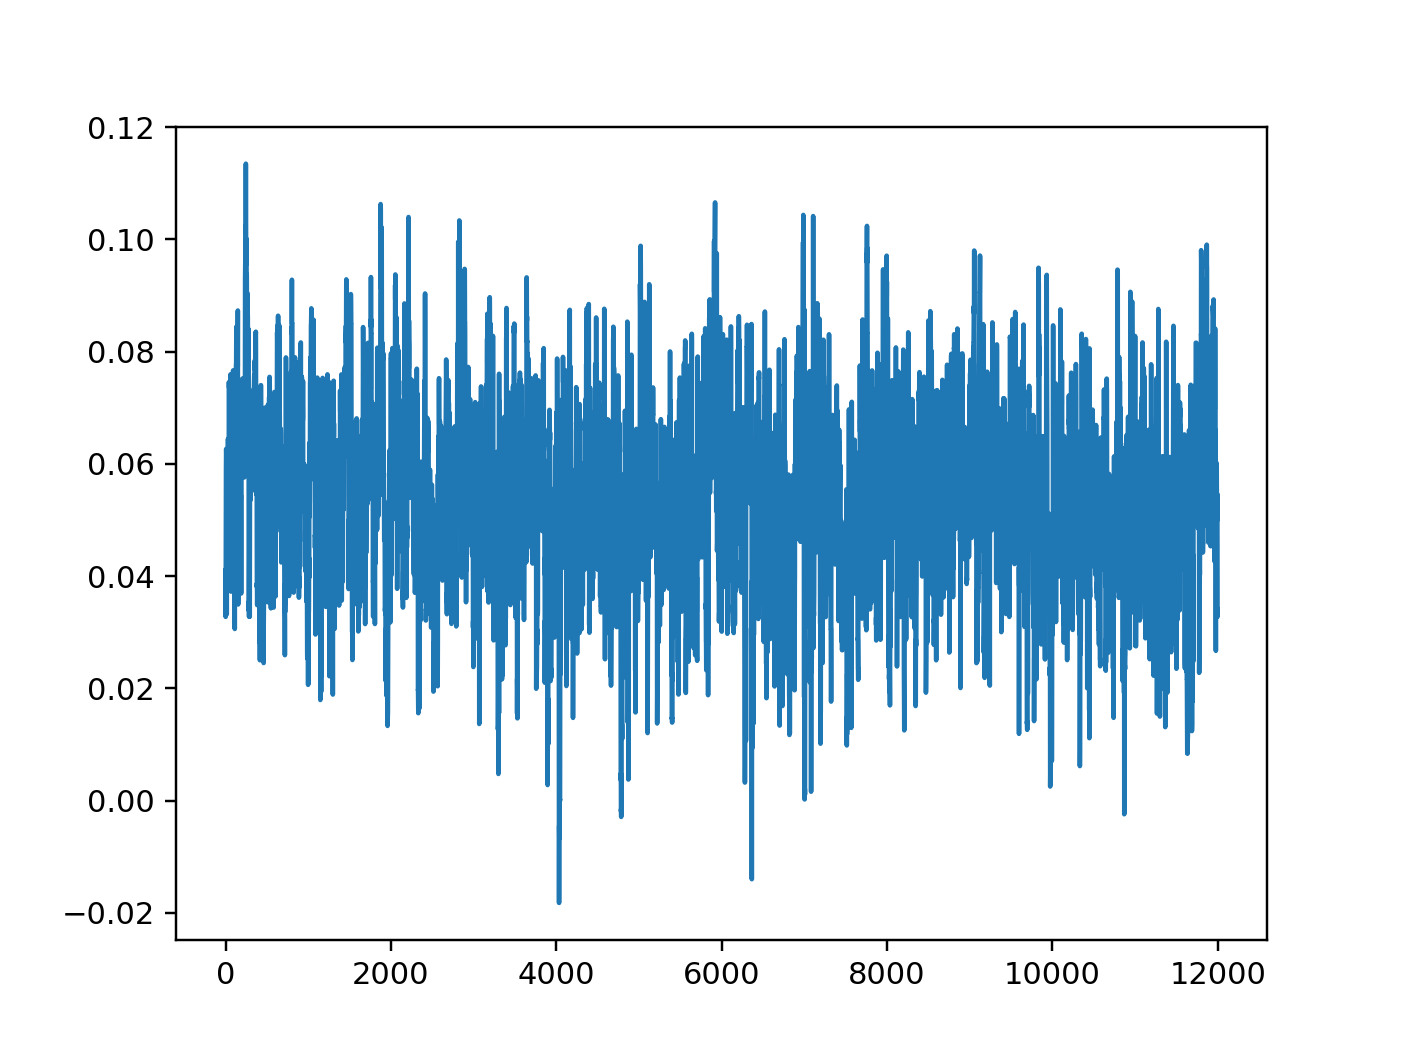

In [107]:
plt.figure()
plt.plot(chain[:,1]);

### And this is one that I'd say is unconverged too

<IPython.core.display.Javascript object>


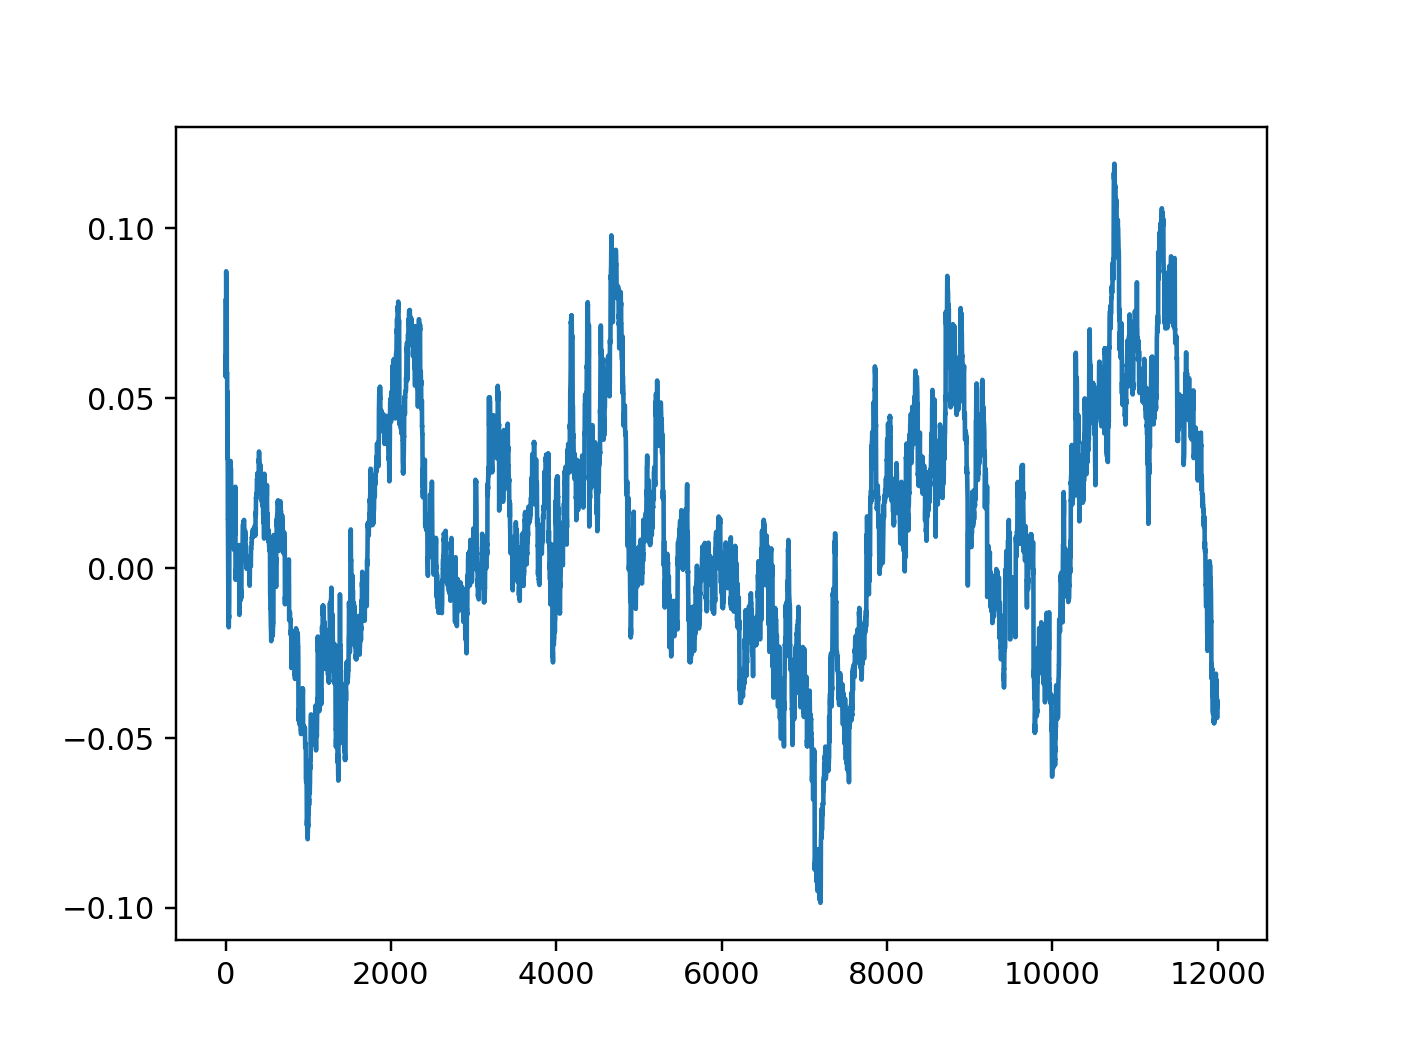

In [108]:
plt.figure()
plt.plot(chain[:,100]);

## Gelman-Rubin test

In [109]:
p = np.arange(3000)
n = len(chain)
chain_new = chain[:, p]
chains = [chain_new[:n//3, :], chain_new[n//3:2*n//3, :], chain_new[2*n//3:n, :]]

In [110]:
steps, res = gelman_rubin.convergence_test(chains, jump=500, tol=0.1)

Step 0 of 4000
Step 500 of 4000
Step 1000 of 4000
Step 1500 of 4000
Step 2000 of 4000
Step 2500 of 4000
Step 3000 of 4000
Step 3500 of 4000
1975 parameters did not converge


### Even with a 10% tolerance (and I usually run a test with 1% tolerance), the majority of the parameters are unconverged.

## Hanson Test

I implemented the Hanson test from here (which seems to just be a talk he gave but I can't get access to the original publication).
http://kmh-lanl.hansonhub.com/publications/valen02.pdf

This is probably not very accurate because I don't have access to the actual gradients computed in HMC and am just approximating by differences.

In [123]:
burn = 0
phi = -np.log(chain[burn:,-1])
x = chain[burn:,:-1]

dphi = np.diff(phi)
dxi = np.diff(x, axis=0)
mu = np.mean(x[:-1,:], axis=0)
dphi_dx = dphi[:,np.newaxis]/dxi 
dphi_dx = np.nan_to_num(dphi_dx)

d = x[:-1,:]-mu

/home/michelle/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/home/michelle/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


In [124]:
R = np.sum(d**3*dphi_dx, axis=0)/(3*np.sum(d**2, axis=0))

/home/michelle/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


In [125]:
R

array([        nan,  0.00681241,  0.01856649, ...,  0.06577784,
       -0.12324826,  0.1684502 ])

In [126]:
np.sum(R>1)

/home/michelle/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


76

<IPython.core.display.Javascript object>


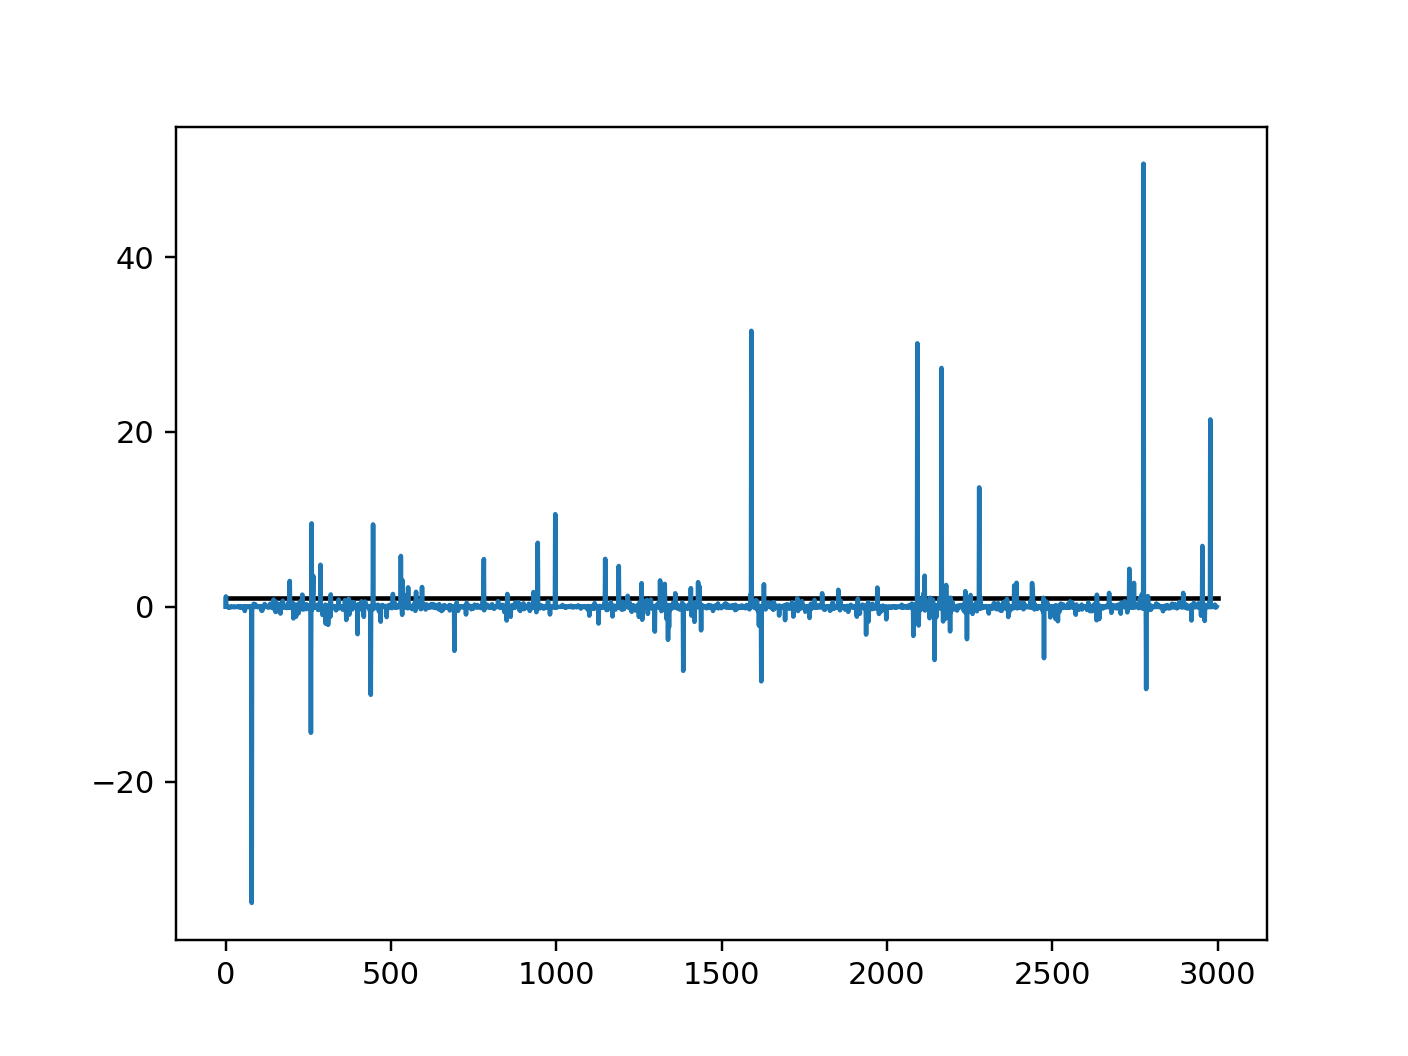

In [102]:
plt.figure()
plt.plot([0,len(chain[0,:-1])], [1,1], color='k');
plt.plot(R[R<1000]);

### R is supposed to be close to 1, if it's below one Hanson claims the chain hasn't converged. By this criterion the chain is even worse, with only a handful of parameters converging

I experimented with various values of "burn-in" but it only seems to make it worse